In [105]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import missingno as ms
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [81]:
df = pd.read_csv('data/netflix_titles.csv',on_bad_lines='skip')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
df.shape

(8807, 12)

In [82]:
# basic visualization
# to handle null values 
round(df.isnull().sum() / df.shape[0]  * 100 , 2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [67]:
df.director.mode()

0    Rajiv Chilaka
Name: director, dtype: object

In [83]:
df.columns
df.cast
print(df.cast.shape)
df.shape

(8807,)


(8807, 12)

In [84]:
cst = df.cast.dropna()
cst


1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7982, dtype: object

In [97]:
lst = []
cst.str.split(",").apply(lambda x : lst.extend(x))
len(set(lst))

39296

In [85]:
lst

['Ama Qamata',
 ' Khosi Ngema',
 ' Gail Mabalane',
 ' Thabang Molaba',
 ' Dillon Windvogel',
 ' Natasha Thahane',
 ' Arno Greeff',
 ' Xolile Tshabalala',
 ' Getmore Sithole',
 ' Cindy Mahlangu',
 ' Ryle De Morny',
 ' Greteli Fincham',
 ' Sello Maake Ka-Ncube',
 ' Odwa Gwanya',
 ' Mekaila Mathys',
 ' Sandi Schultz',
 ' Duane Williams',
 ' Shamilla Miller',
 ' Patrick Mofokeng',
 'Sami Bouajila',
 ' Tracy Gotoas',
 ' Samuel Jouy',
 ' Nabiha Akkari',
 ' Sofia Lesaffre',
 ' Salim Kechiouche',
 ' Noureddine Farihi',
 ' Geert Van Rampelberg',
 ' Bakary Diombera',
 'Mayur More',
 ' Jitendra Kumar',
 ' Ranjan Raj',
 ' Alam Khan',
 ' Ahsaas Channa',
 ' Revathi Pillai',
 ' Urvi Singh',
 ' Arun Kumar',
 'Kate Siegel',
 ' Zach Gilford',
 ' Hamish Linklater',
 ' Henry Thomas',
 ' Kristin Lehman',
 ' Samantha Sloyan',
 ' Igby Rigney',
 ' Rahul Kohli',
 ' Annarah Cymone',
 ' Annabeth Gish',
 ' Alex Essoe',
 ' Rahul Abburi',
 ' Matt Biedel',
 ' Michael Trucco',
 ' Crystal Balint',
 ' Louis Oliver',
 '

In [86]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [87]:
df[df.director == 'Rajiv Chilaka']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


In [76]:
for k ,v in df.groupby('director'):
    print(k,v.shape[0])

A. L. Vijay 2
A. Raajdheep 1
A. Salaam 1
A.R. Murugadoss 2
Aadish Keluskar 1
Aamir Bashir 1
Aamir Khan 1
Aanand Rai 1
Aaron Burns 1
Aaron Hancox, Michael McNamara 1
Aaron Hann, Mario Miscione 1
Aaron Lieber 1
Aaron Nee, Adam Nee 1
Aaron Sorkin 2
Aaron Woodley 1
Aatmaram Dharne 1
Abba T. Makama 2
Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla 4
Abbas Mustan 1
Abbas Tyrewala 1
Abby Epstein 1
Abdellatif Kechiche 1
Abdul Aziz Hashad 1
Abdulaziz Alshlahei 1
Abel Ferrara 1
Abhay Chopra 1
Abhijeet Deshpande 1
Abhijit Kokate, Srivinay Salian 1
Abhijit Panse 2
Abhinay Deo 3
Abhishek Chaubey 3
Abhishek Kapoor 3
Abhishek Saxena 1
Abhishek Sharma 3
Abhishek Varman 1
Abir Sengupta 1
Abu Bakr Shawky 1
Achille Brice 1
Adam Alleca 1
Adam B. Stein, Zach Lipovsky 1
Adam Bhala Lough 1
Adam Bolt 1
Adam Collins, Luke Radford 1
Adam Davis, Jerry Kolber, Trey Nelson, Erich Sturm 1
Adam Del Giudice 1
Adam Deyoe 1
Adam Dubin 1
Adam Leon 1
Adam MacDonald 1
Adam Marino 1
Adam McKay 3
Adam Nimoy 1
Adam Randa

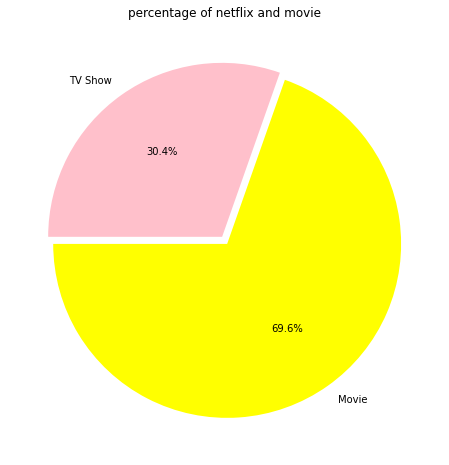

In [93]:
# plt.figure(figsize=(15,8))
# plt.title('percentage of netflix and movie')
# information=plt.pie(df.type.value_counts(),explode=(0.025,0,0.025),
# labels=df.type.value_counts().index,colors=['pink','yellow'],autopct='%1.1f%%')
plt.figure(figsize=(15,8))


plt.title('percentage of netflix and movie')

imformation=plt.pie(df.type.value_counts(),explode=(0.025,0.025),# "explode it is use to gape in nt and mv"
labels=df.type.value_counts().index, colors=['yellow','pink'],autopct='%1.1f%%', startangle=180)

# its your choice to give the color otherwise its automaticaly show ramdom color

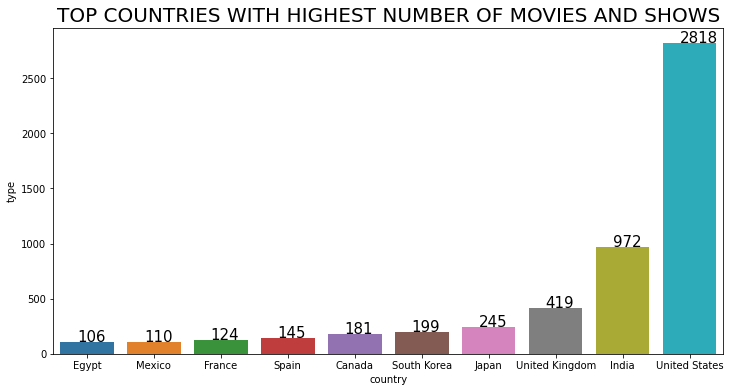

In [119]:

countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

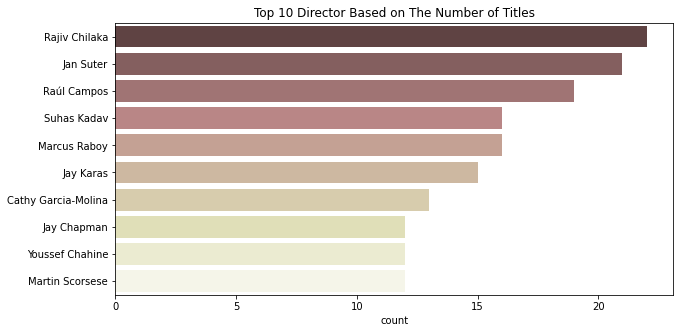

In [95]:
data_D = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,5))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = data_D, order=data_D.value_counts().index[:10], palette='pink')
plt.show()

fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

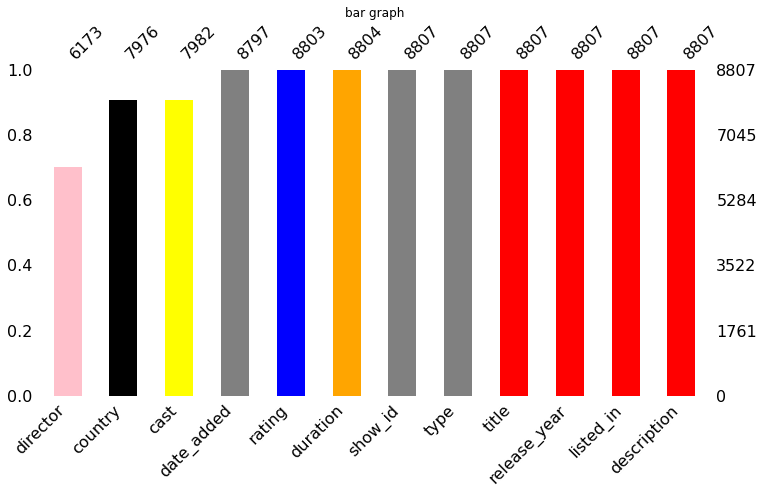

In [118]:
color = ['pink','black','yellow','grey','blue','orange','grey','grey','red','red','red','red']
ms.bar(df,fontsize =16, color = color, sort = 'ascending', figsize = (12,6))
plt.title("bar graph")
plt.show()